<a href="https://colab.research.google.com/github/Aayush2799/Intoxication-Detection-using-Accelerometer-and-TAC/blob/main/Aayush_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project 2

Evaluating Permutation Entropy and Complexity Techniques for Heavy Drinking Detection from Bar Crawl Data.

Steps for the Project involve;

1) Data Cleaning,

2) Loading TAC Dataset,

3) Merge Data Frames,

4) Merging Data and Visualization.

5) Insights and Conclusion.

In [ ]:
# Connecting Google to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Changing the Location where my dataset is stored
%cd /content/drive/MyDrive/fda project 2/


/content/drive/MyDrive/fda project 2


In [ ]:
#Importing all the necassary Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_accelaration = pd.read_csv('all_accelerometer_data_pids_13.csv')

In [ ]:
df_accelaration

time     pid         x         y         z
0                     0  JB3156  0.000000  0.000000  0.000000
1                     0  CC6740  0.000000  0.000000  0.000000
2         1493733882409  SA0297  0.075800  0.027300 -0.010200
3         1493733882455  SA0297 -0.035900  0.079400  0.003700
4         1493733882500  SA0297 -0.242700 -0.086100 -0.016300
...                 ...     ...       ...       ...       ...
14057562  1493829248196  CC6740 -0.133956  0.124726 -0.010736
14057563  1493829248220  CC6740 -0.100764  0.180872  0.046449
14057564  1493829248245  CC6740 -0.131853  0.195934  0.181088
14057565  1493829248270  CC6740 -0.149704  0.194482  0.202393
14057566  1493829248294  CC6740 -0.107288  0.153548  0.168595

[14057567 rows x 5 columns]

### 1) Data Cleaning

In [ ]:
df_accelaration.isnull().sum()

time    0
pid     0
x       0
y       0
z       0
dtype: int64

In [ ]:
df_accelaration.dtypes

time      int64
pid      object
x       float64
y       float64
z       float64
dtype: object

In [ ]:
# Invalid timestamps are present in the first two rows.
# Eliminating the initial two rows


df_accelaration = df_accelaration.drop([0, 1]).reset_index(drop=True)

In [ ]:
df_accelaration.head(7)

time     pid       x       y       z
0  1493733882409  SA0297  0.0758  0.0273 -0.0102
1  1493733882455  SA0297 -0.0359  0.0794  0.0037
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105
5  1493733883957  SA0297 -0.0413 -0.0001  0.0017
6  1493733883963  SA0297 -0.0286 -0.0028 -0.0094

### Renamed time to timestamp for easy implementation

In [ ]:
df_accelaration = df_accelaration.rename(columns={"time":"timestamp"})

df_accelaration.head(7)

In [ ]:
df_accelaration['timestamp'] = (df_accelaration['timestamp'])//1000


In [ ]:
%cd /content/drive/MyDrive/fda project 2/

/content/drive/MyDrive/fda project 2


### 2) Loading TAC Daataset

In [ ]:
df_SA0297 = pd.read_csv('SA0297_clean_TAC.csv')

df_BK7610 = pd.read_csv('BK7610_clean_TAC.csv')
# df_BK7610['pid'] = 'BK7610'

df_BU4707 = pd.read_csv('BU4707_clean_TAC.csv')
# df_BU4707['pid'] = 'BU4707'

df_CC6740 = pd.read_csv('CC6740_clean_TAC.csv')
# df_CC6740['pid'] = 'CC6740'

df_DC6359 = pd.read_csv('DC6359_clean_TAC.csv')
# df_DC6359['pid'] = 'DC6359'

df_DK3500 = pd.read_csv('DK3500_clean_TAC.csv')
# df_DK3500['pid'] = 'DK3500'

df_HV0618 = pd.read_csv('HV0618_clean_TAC.csv')
# df_HV0618['pid'] = 'HV0618'

df_JB3156 = pd.read_csv('JB3156_clean_TAC.csv')
# df_JB3156['pid'] = 'JB3156'

df_JR8022 = pd.read_csv('JR8022_clean_TAC.csv')
# df_JR8022['pid'] = 'JR8022'

df_MC7070 = pd.read_csv('MC7070_clean_TAC.csv')
# df_MC7070['pid'] = 'MC7070'

df_MJ8002 = pd.read_csv('MJ8002_clean_TAC.csv')
# df_MJ8002['pid'] = 'MJ8002'

df_PC6771 = pd.read_csv('PC6771_clean_TAC.csv')
# df_PC6771['pid'] = 'PC6771'

df_SF3079 = pd.read_csv('SF3079_clean_TAC.csv')
# df_SF3079['pid'] = 'SF3079'

### 3) Generate the merged dataframes for each Participant ID (PID), the code combines accelerometer data with Transdermal Alcohol Concentration (TAC) data for each PID.

In [ ]:
import pandas as pd

# Define a function to merge accelerometer data with TAC data for each PID
def merge_accelerometer_with_tac(pid):
    df_pid_tac = globals()[f"df_{pid}"]
    df_pid_acc = df_accelaration[df_accelaration['pid'] == pid]
    merged_pid_data = pd.merge(df_pid_tac, df_pid_acc, on='timestamp')
    return merged_pid_data

# List of all PIDs
pids = ['SA0297', 'BK7610', 'BU4707', 'CC6740', 'DC6359', 'DK3500', 'HV0618', 'JB3156', 'JR8022', 'MC7070', 'MJ8002', 'PC6771', 'SF3079']

# Dictionary to store merged dataframes for each PID
merged_dict_data = {}

# Iterate over each PID, merge accelerometer data with TAC data, and store in dictionary
for pid in pids:
    merged_pid_data = merge_accelerometer_with_tac(pid)
    merged_dict_data[pid] = merged_pid_data

for pid, merged_pid_data in merged_dict_data.items():
    print(f"Merged data for PID {pid}:")
    merged_pid_data



### 4) The merged dataframe for Participant ID 'HV0618' is retrieved and printed by this code from the dictionary. The combined data for 'HV0618' is shown.

In [ ]:
merged_data_HV0618 = merged_dict_data['HV0618']

# Print the merged dataframe for HV0618
print("Merged data for PID HV0618:")
merged_data_HV0618

### 5) The accelerometer (x, y, z) and TAC measurements of each participant are plotted against time as this algorithm iterates through their combined data. The PID is mentioned in the title for identification, and each subplot indicates a distinct reading.

<ipython-input-43-82ce001567fb>:11: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(timestamp, "x", data=merged_pid_data)
<ipython-input-43-82ce001567fb>:12: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(timestamp, "y", data=merged_pid_data)


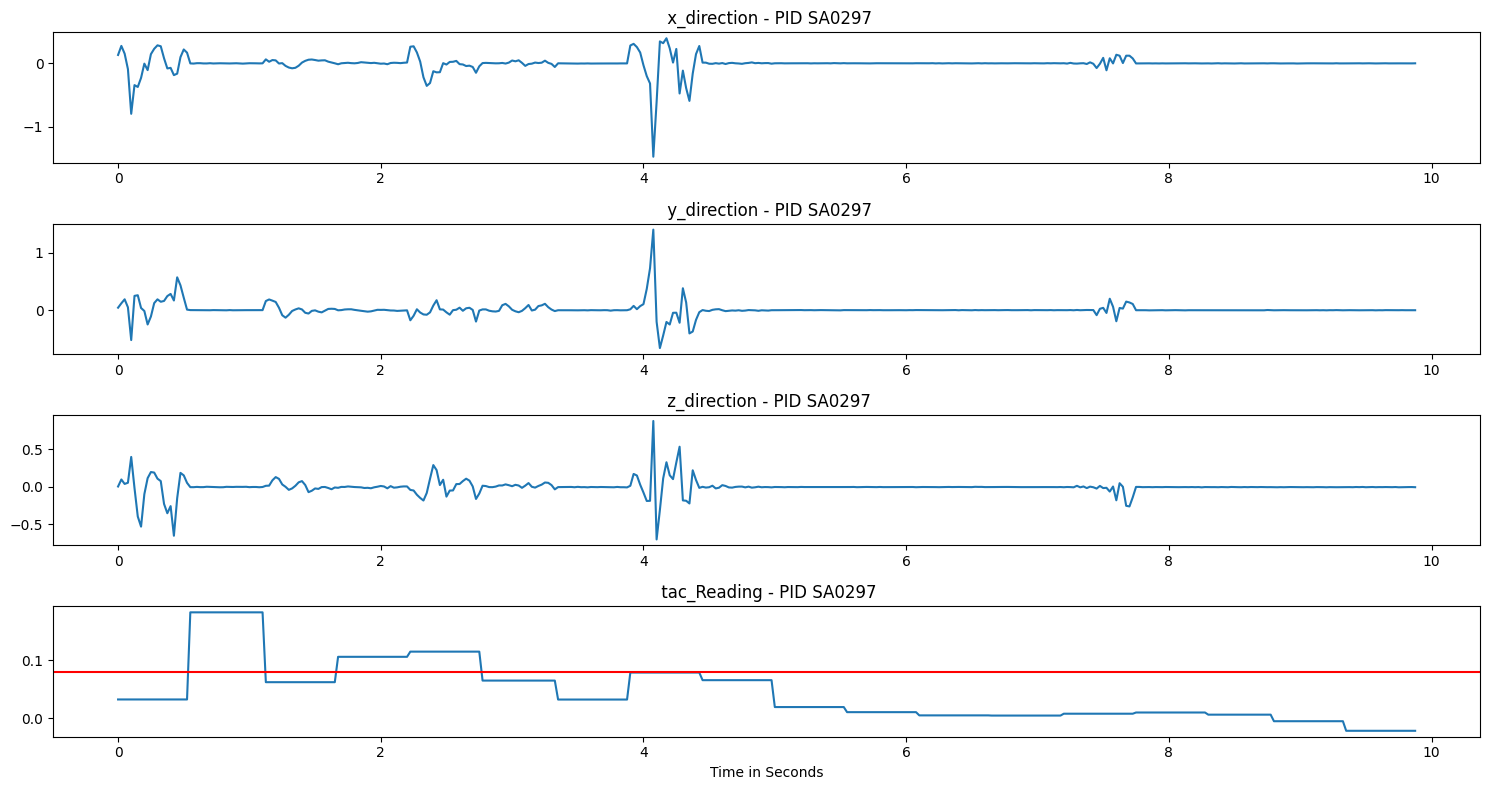

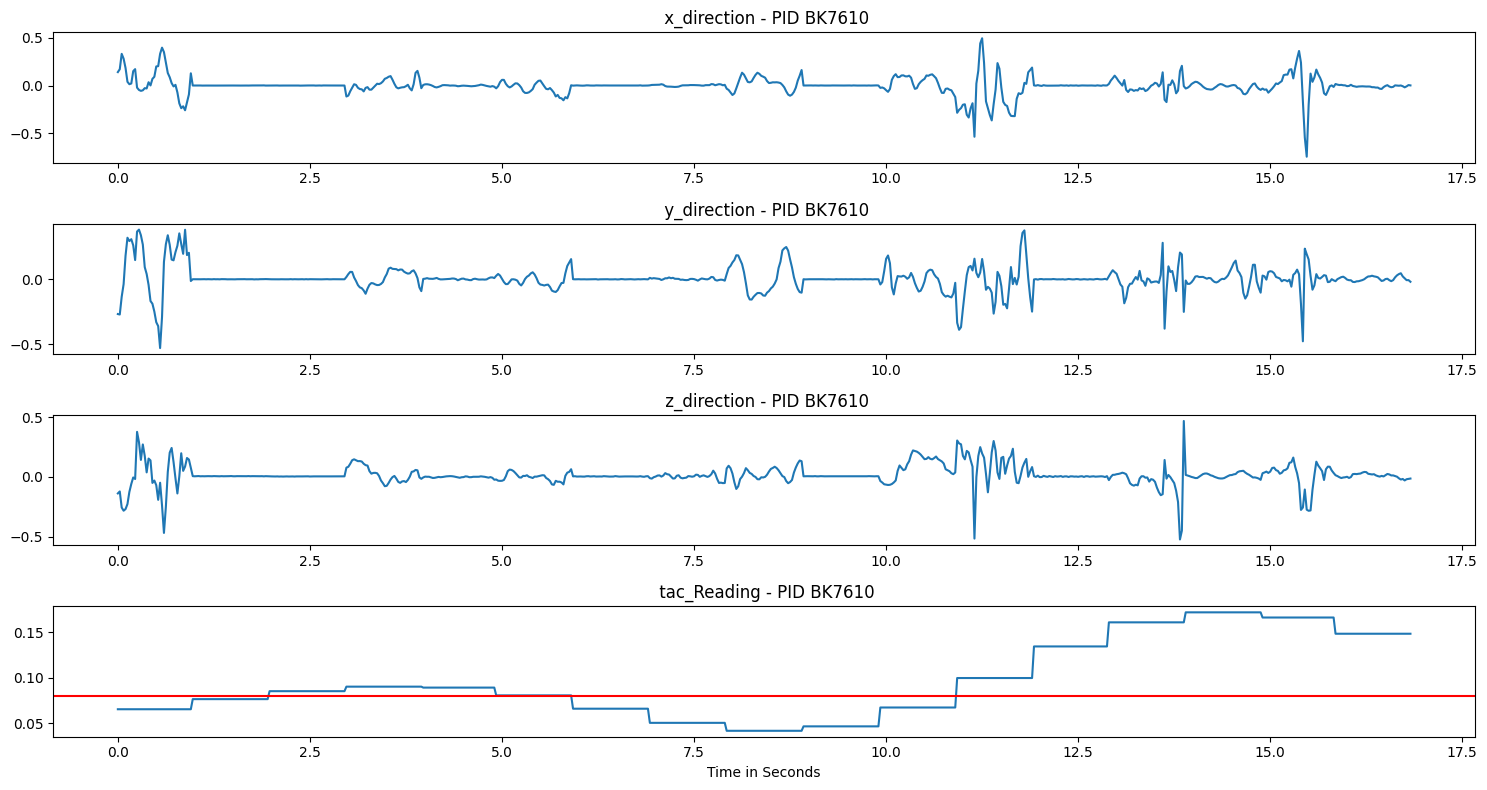

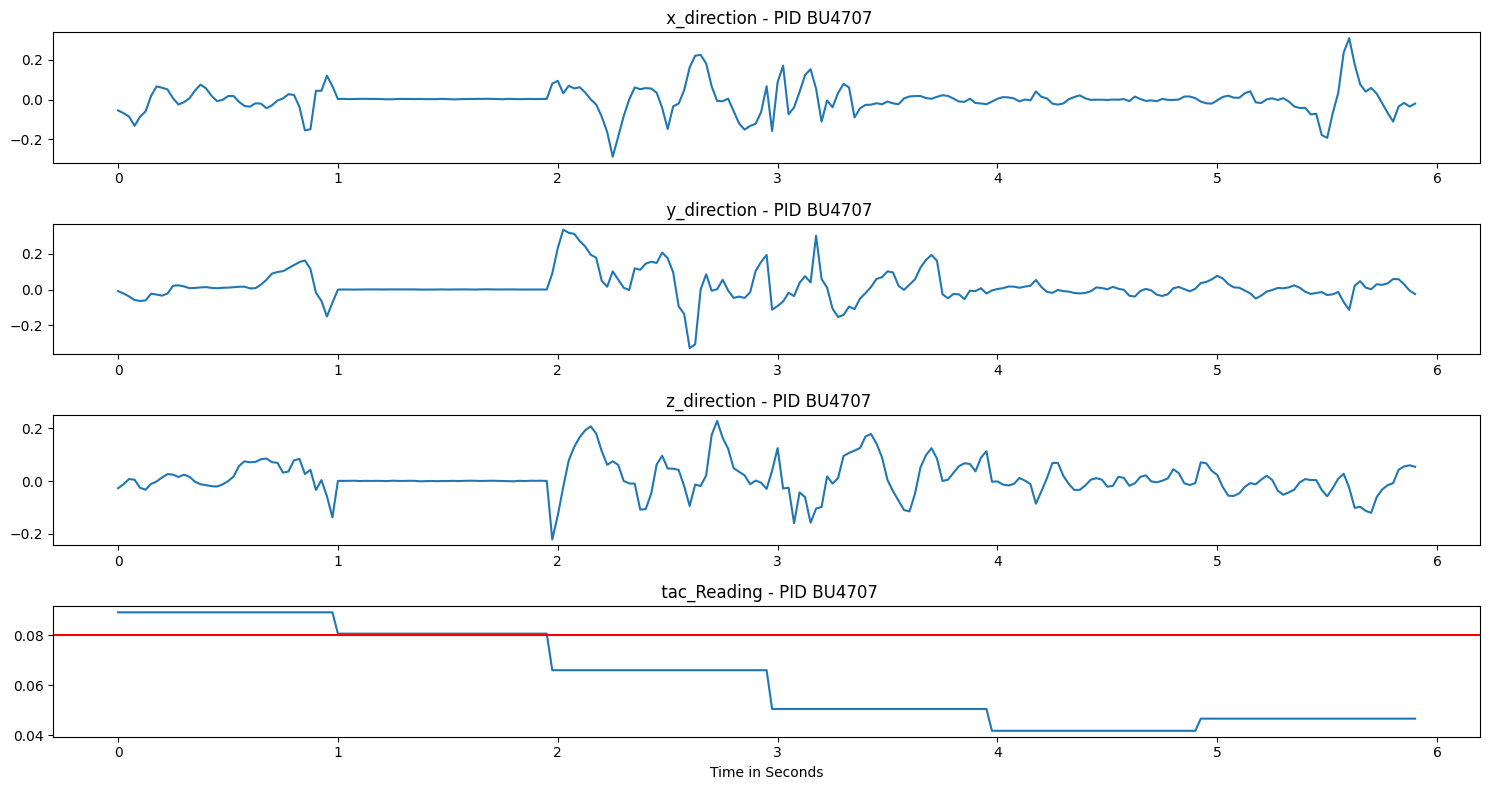

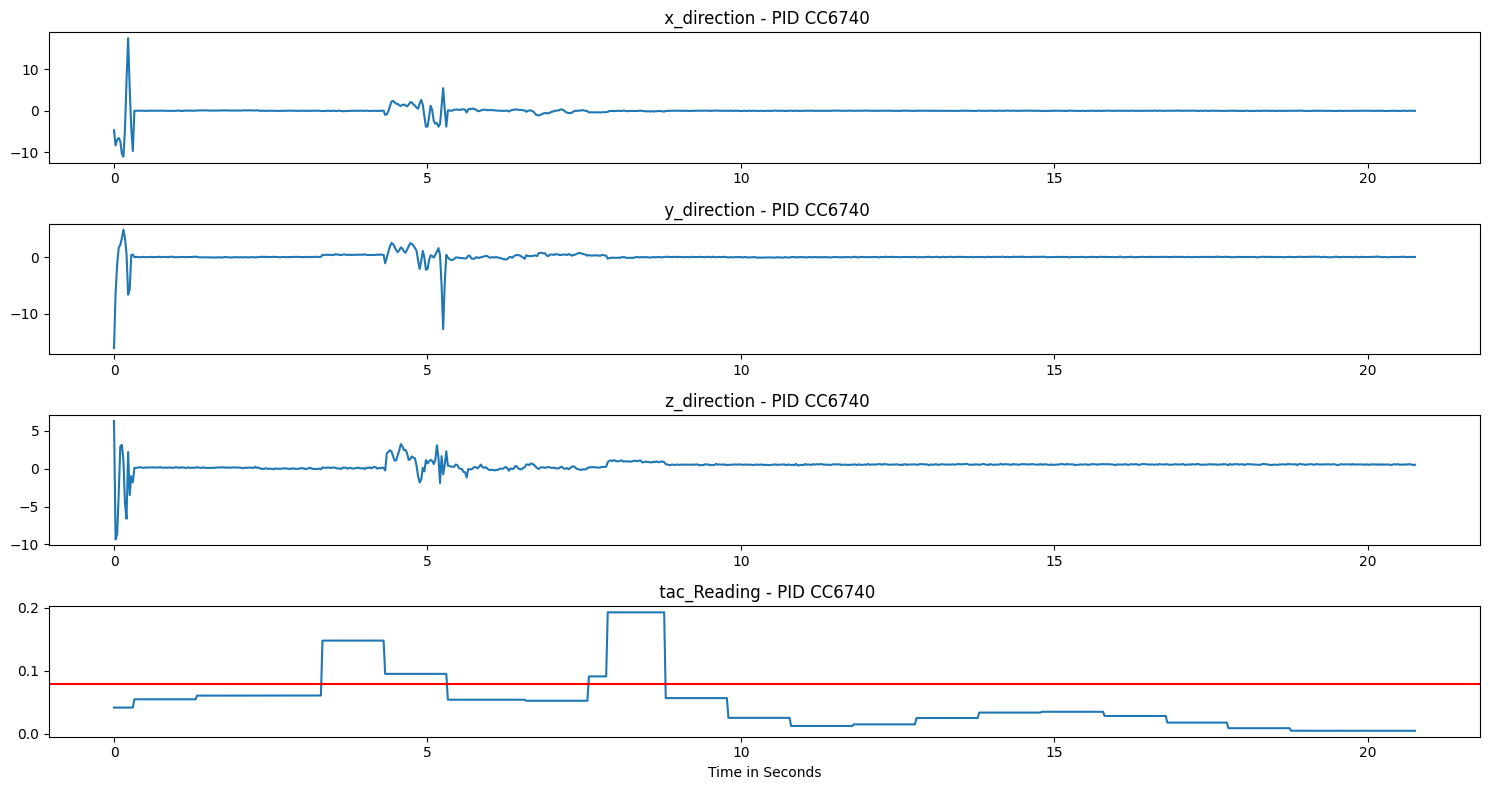

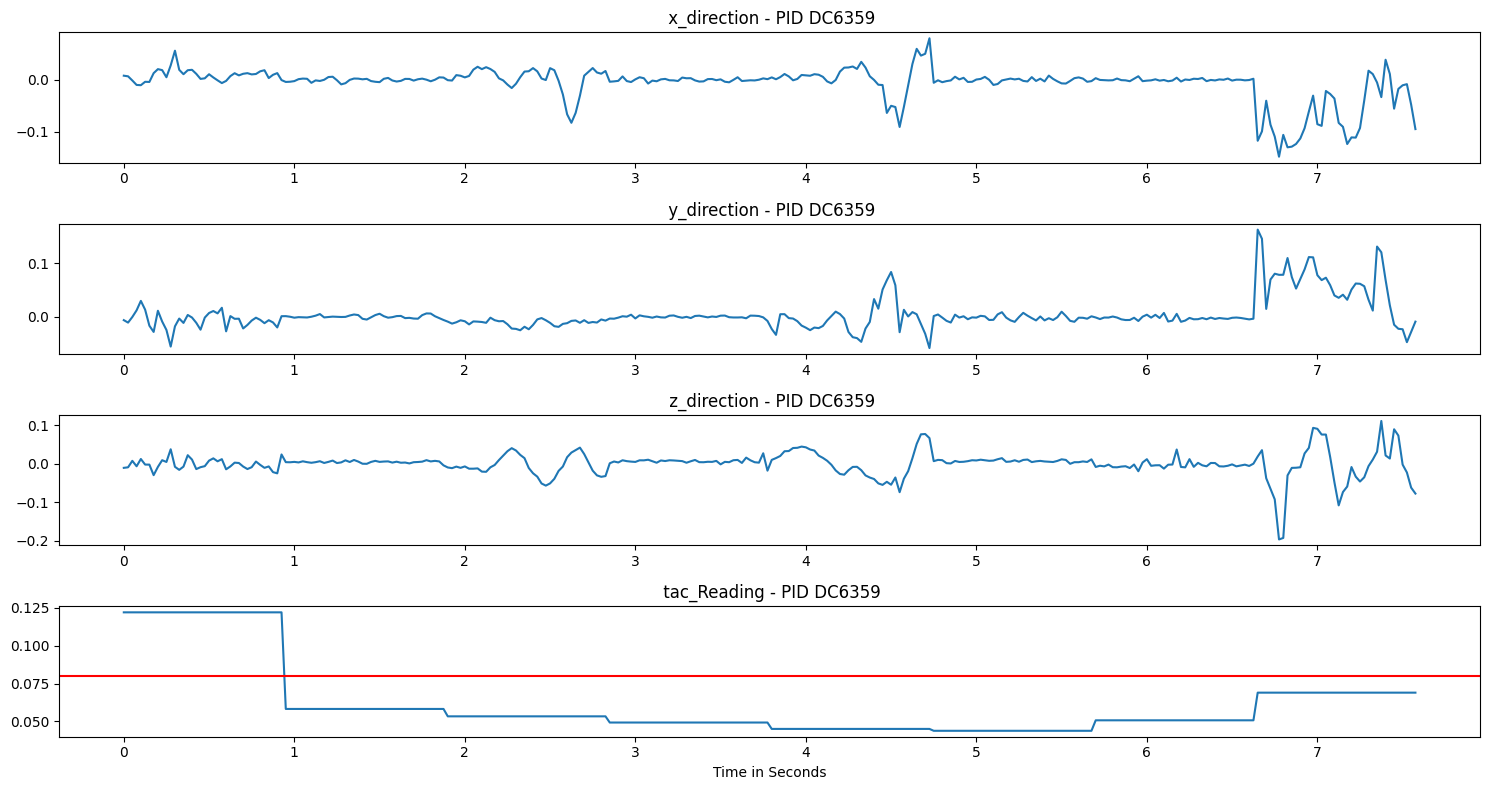

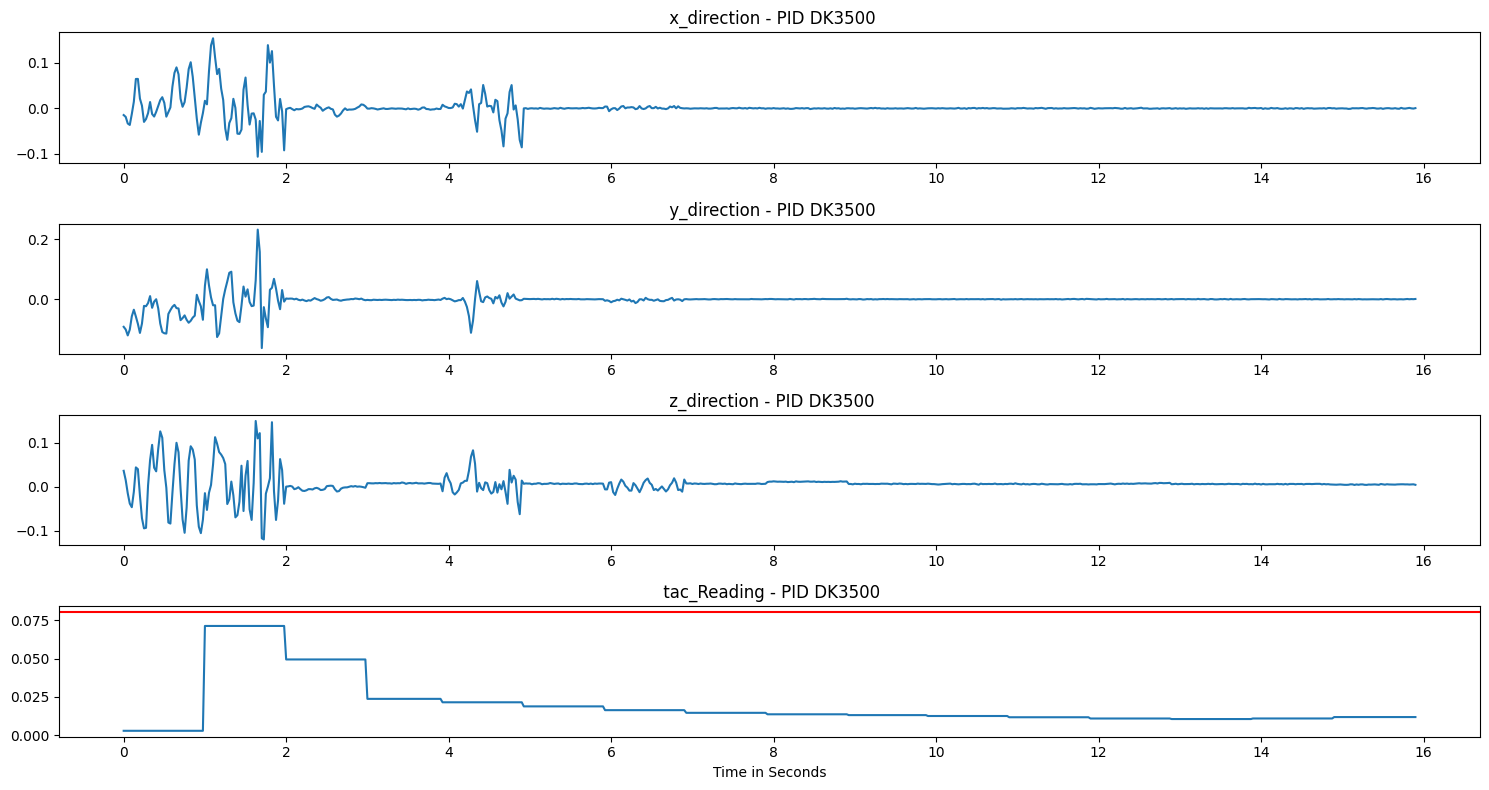

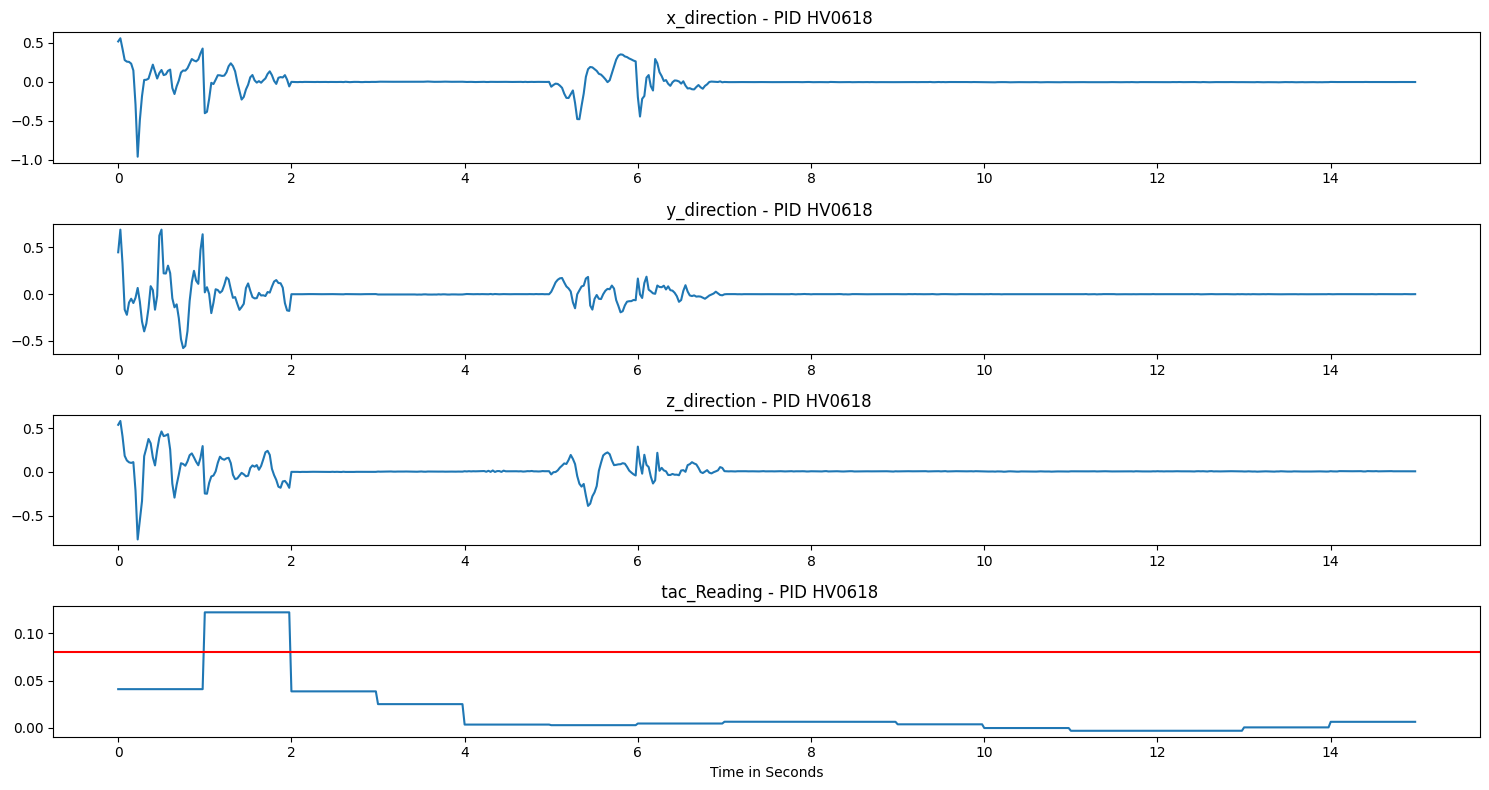

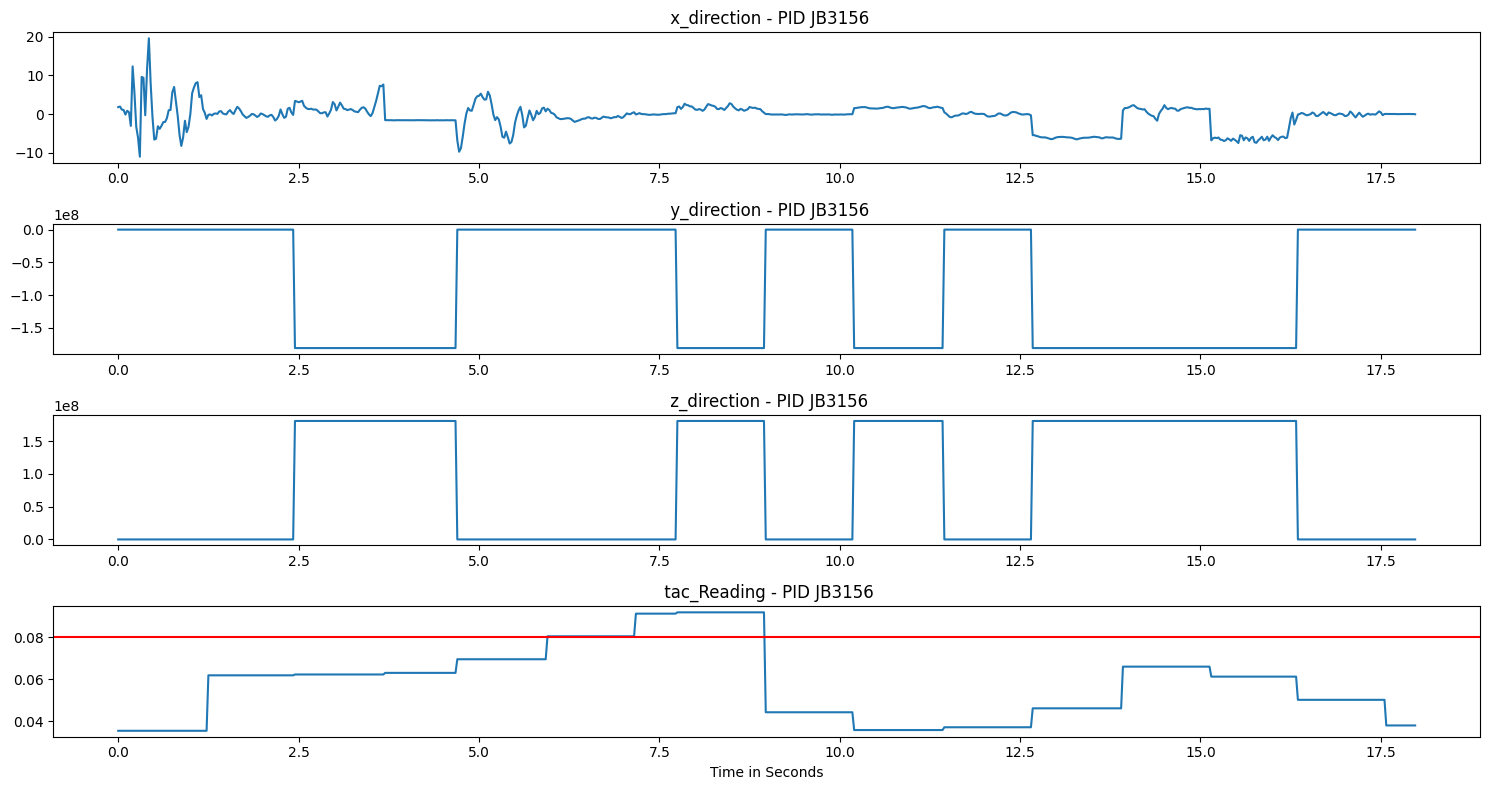

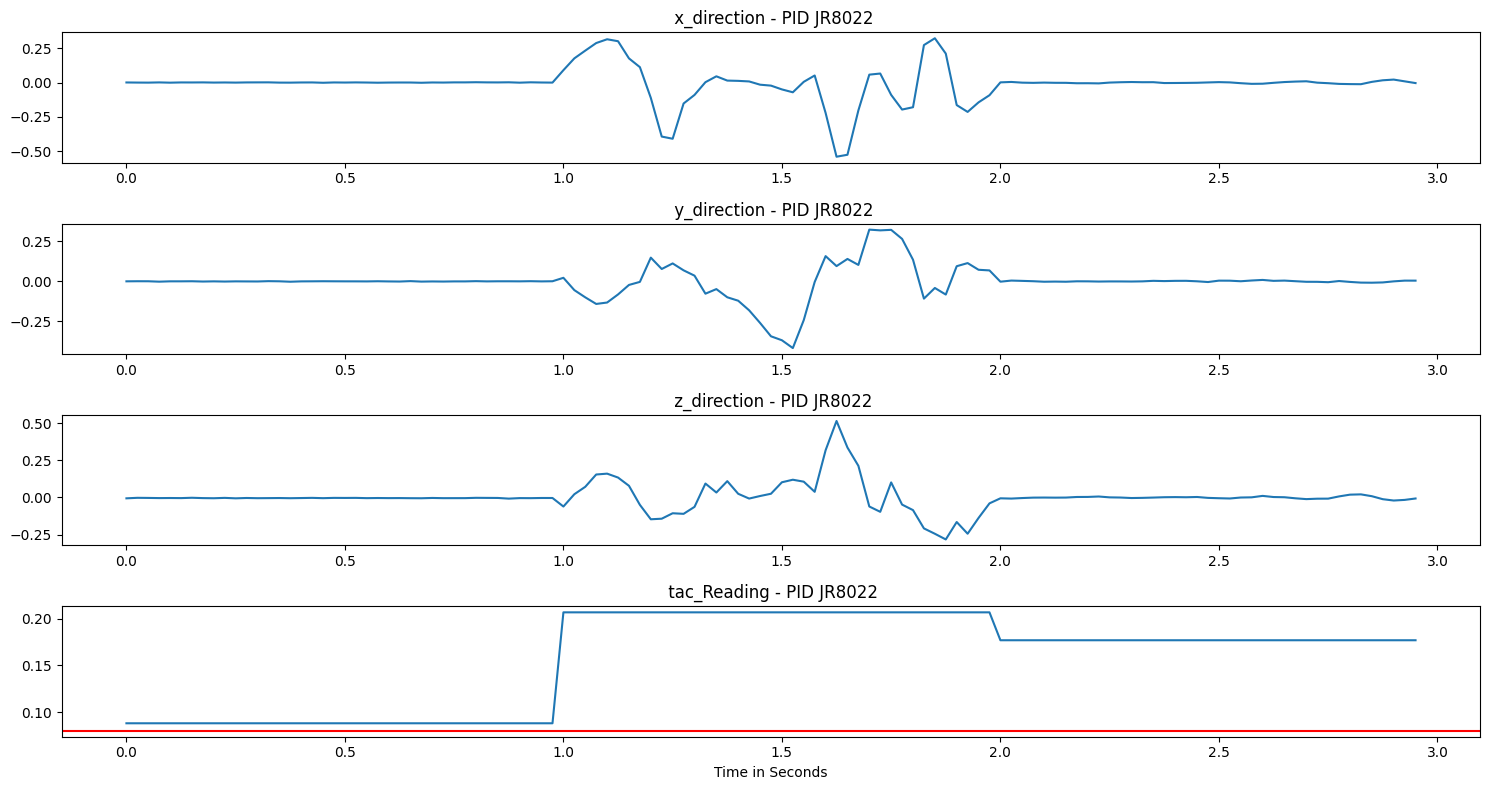

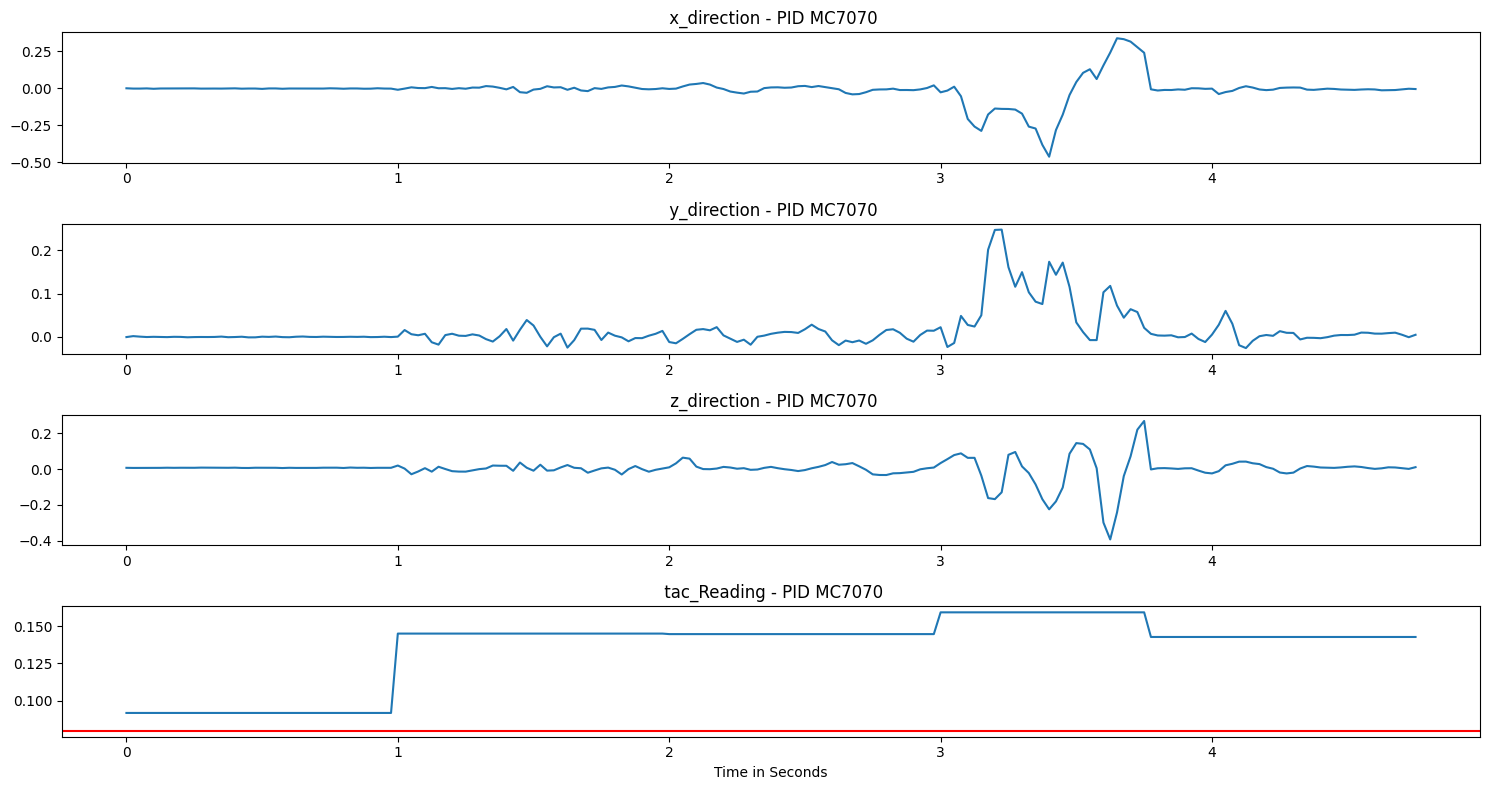

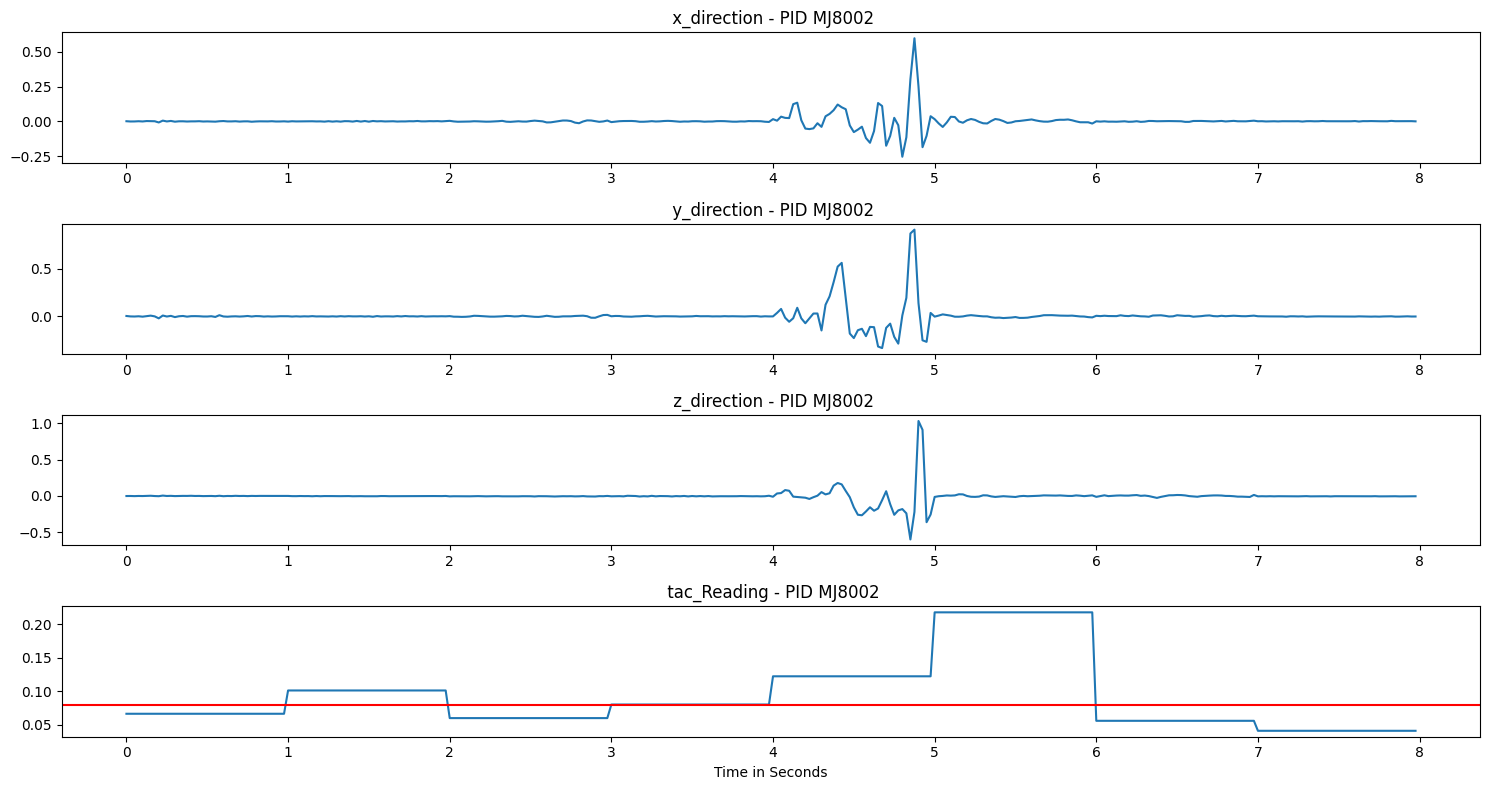

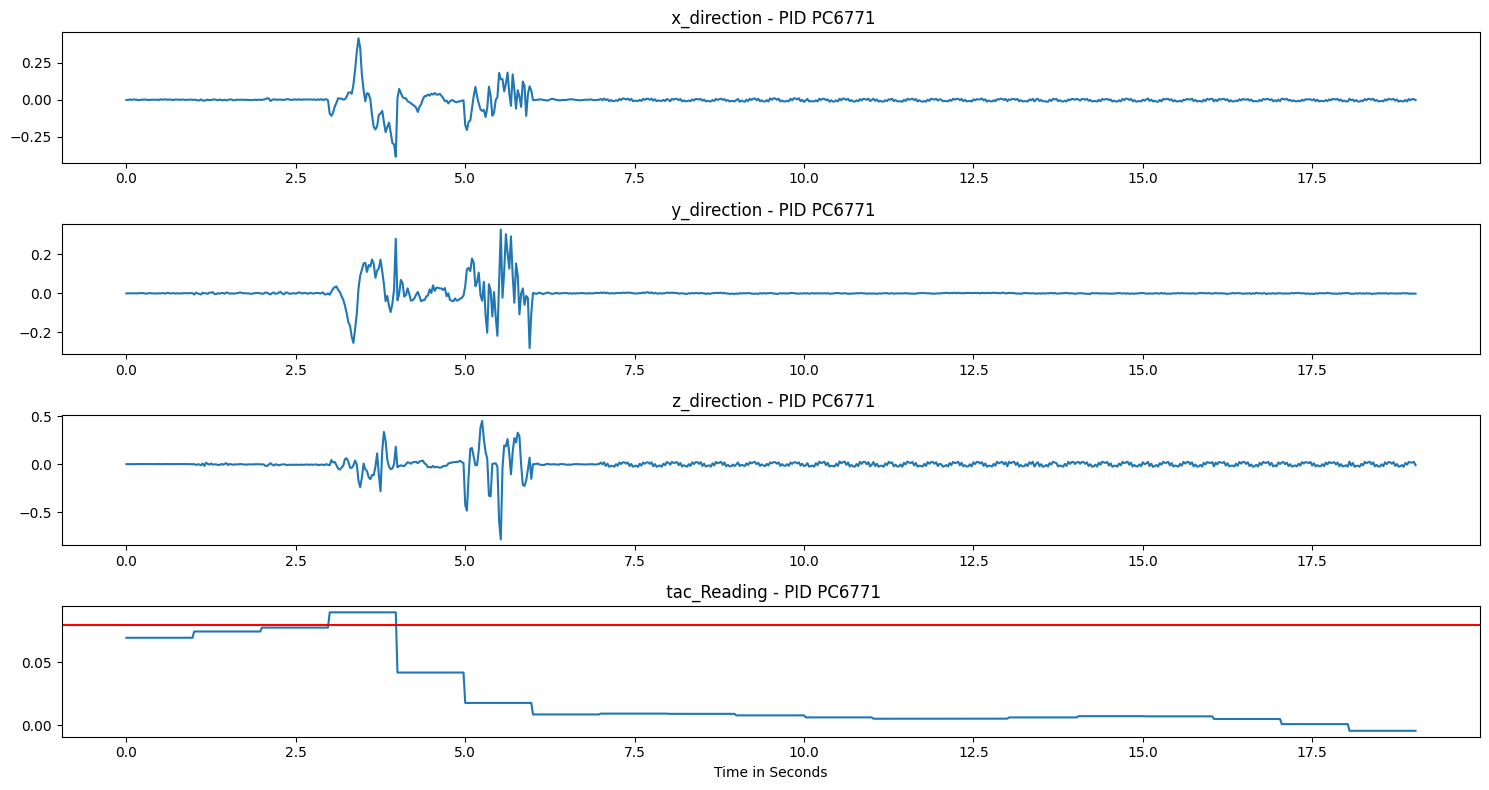

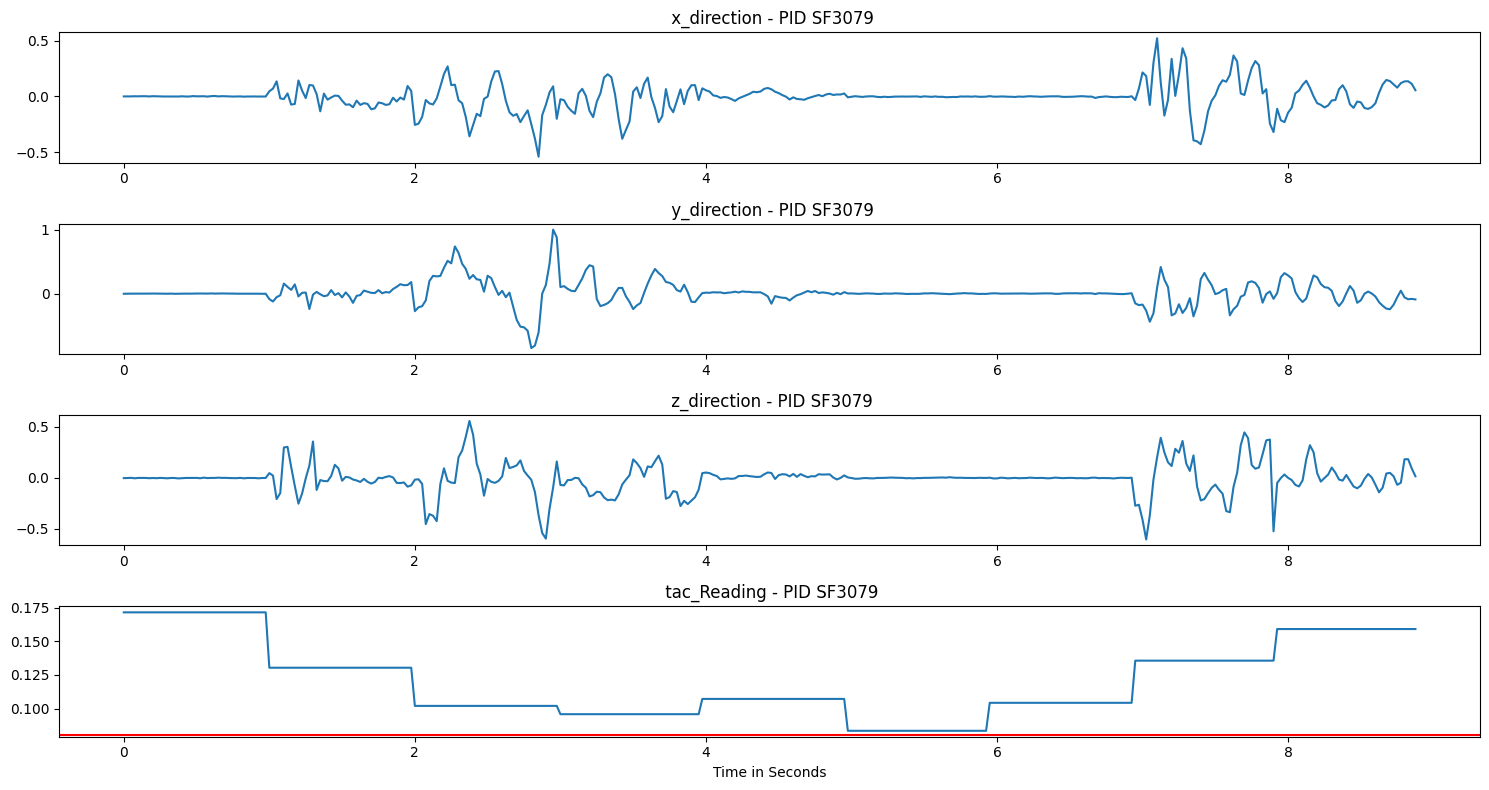

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


for pid in merged_dict_data:
    merged_pid_data = merged_dict_data[pid]
    timestamp = np.arange(merged_pid_data['x'].size) / 40
    fig, ax = plt.subplots(4, figsize=(15, 8))
    plt.xlabel("Time in Seconds")

    ax[0].plot(timestamp, "x", data=merged_pid_data)
    ax[1].plot(timestamp, "y", data=merged_pid_data)
    ax[2].plot(timestamp, "z", data=merged_pid_data)
    ax[3].plot(timestamp, "TAC_Reading", data=merged_pid_data)
    ax[3].axhline(y=0.08, color='r', linestyle='-')

    ax[0].set_title(f" x_direction - PID {pid}")
    ax[1].set_title(f" y_direction - PID {pid}")
    ax[2].set_title(f" z_direction - PID {pid}")
    ax[3].set_title(f" tac_Reading - PID {pid}")

    plt.tight_layout()

    plt.show()


### 6) With the help of ordinal patterns, the code tries to calculate complexity and entropy. After that, depending on variations in Transdermal Alcohol Concentration (TAC) readings, it computes entropy and complexity for every data segment. The permutation entropy and complexity results are presented for each axis (x, y, z) and Participant ID (PID) using Lineplot.

---



<ipython-input-69-77b7b490588e>:39: RuntimeWarning: invalid value encountered in scalar divide
  return entropy_s(p) / max_entropy
<ipython-input-69-77b7b490588e>:46: RuntimeWarning: divide by zero encountered in scalar divide
  Q_o = -1 / (constant1 + constant2 + constant3)
<ipython-input-69-77b7b490588e>:51: RuntimeWarning: invalid value encountered in scalar multiply
  Comp_JS = Q_o * JSdivergence * pe


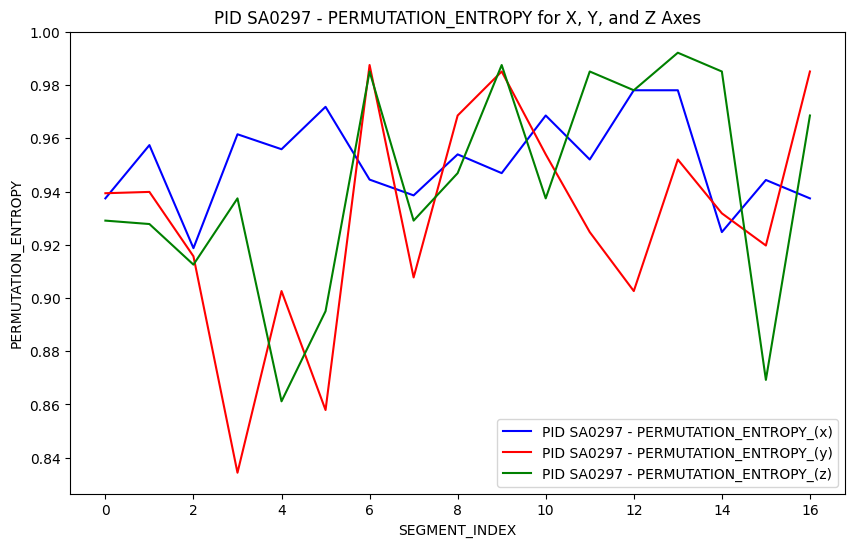

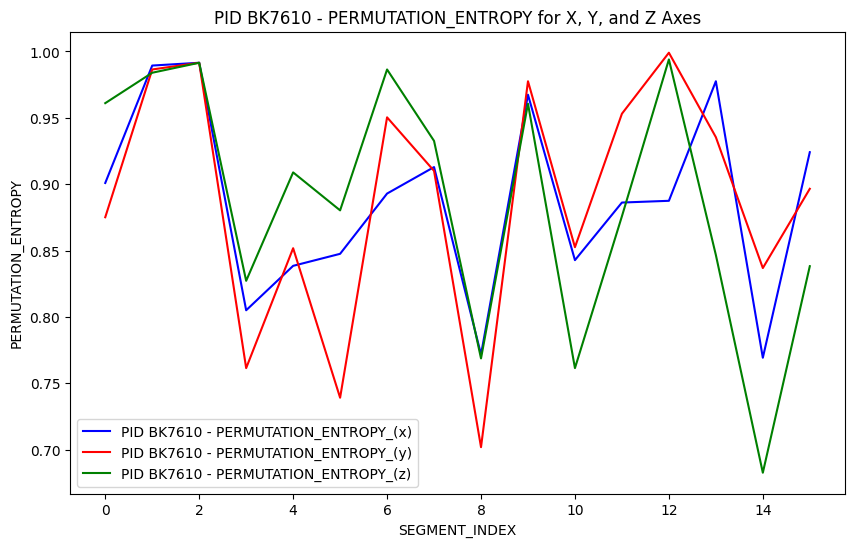

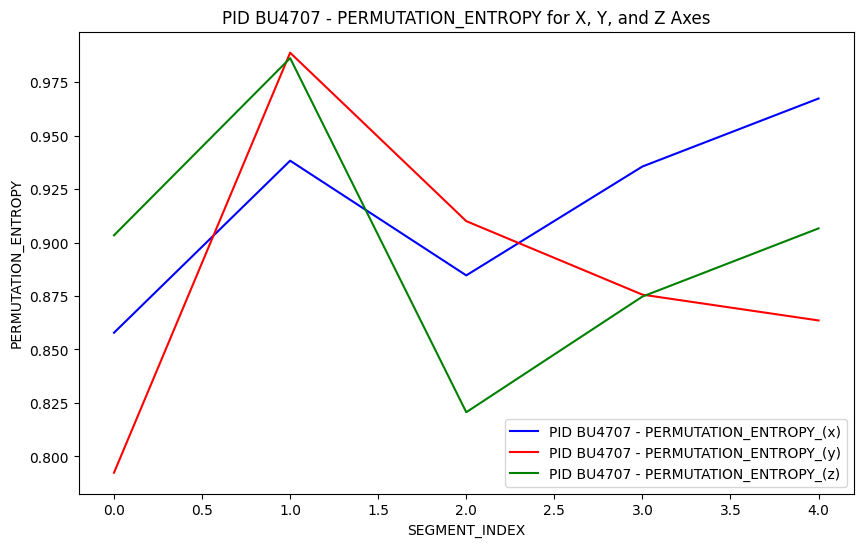

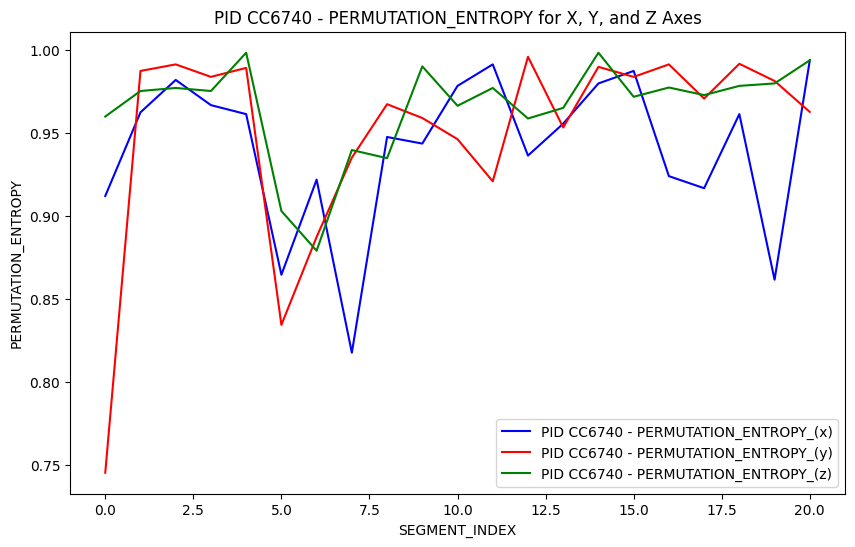

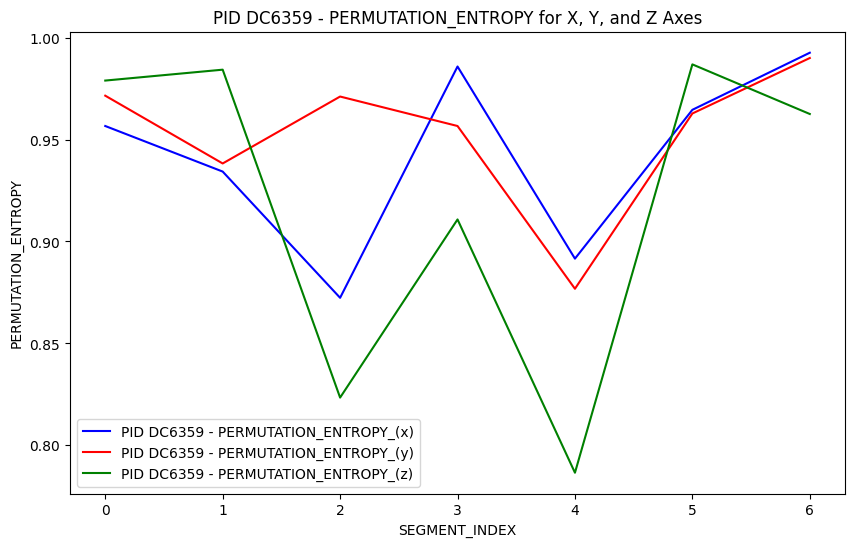

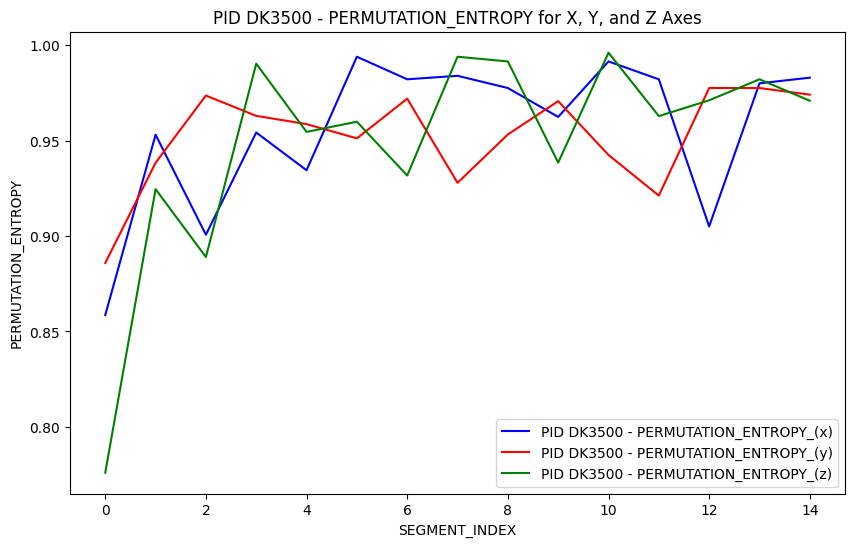

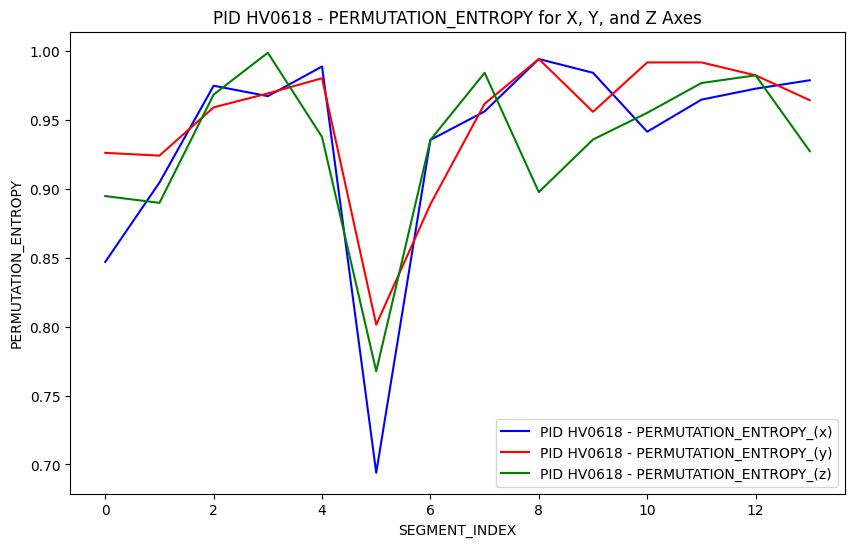

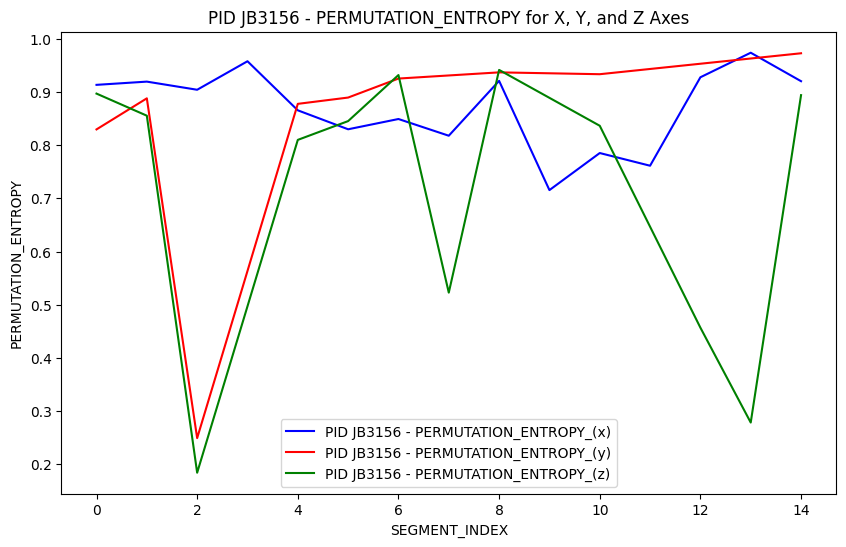

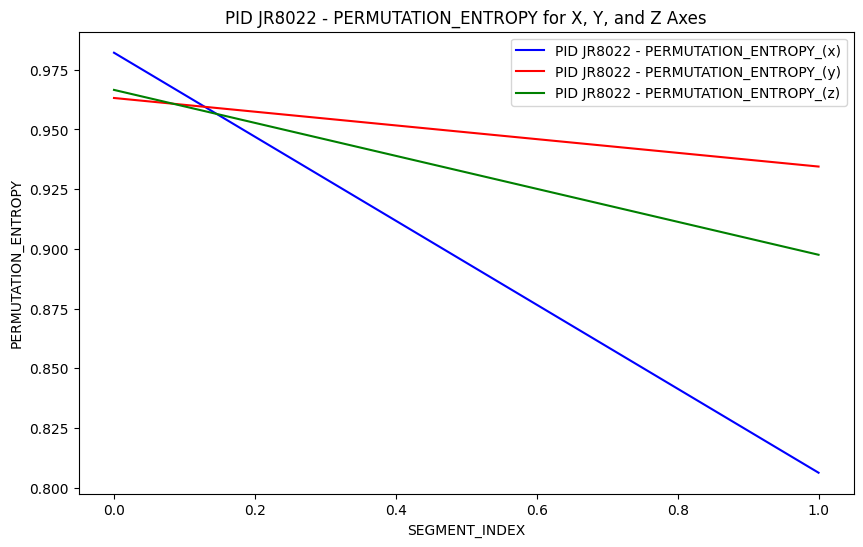

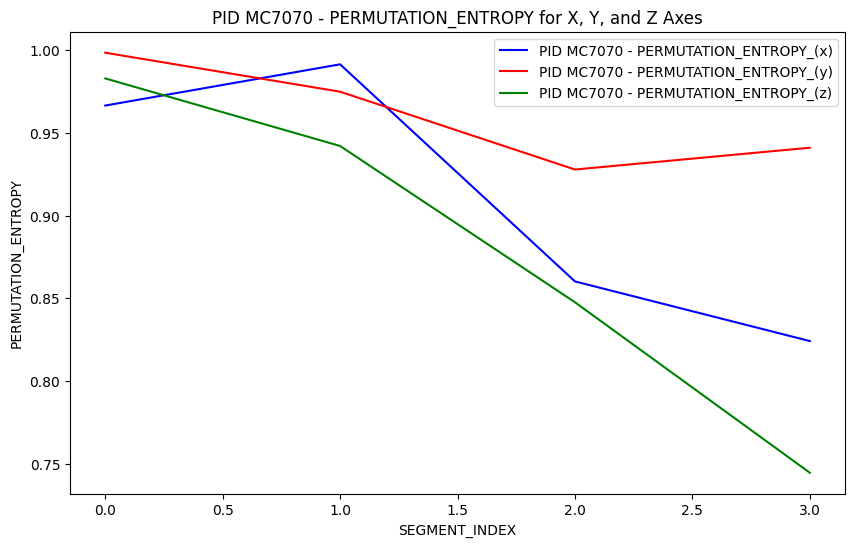

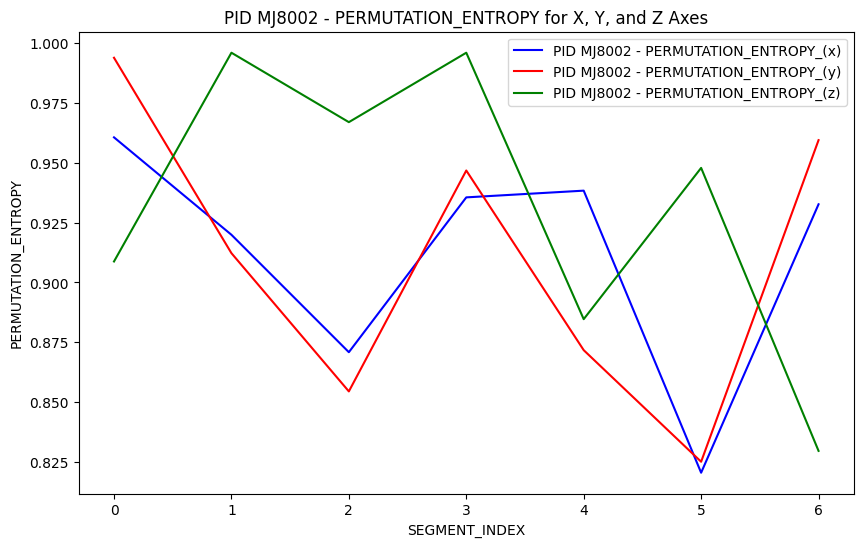

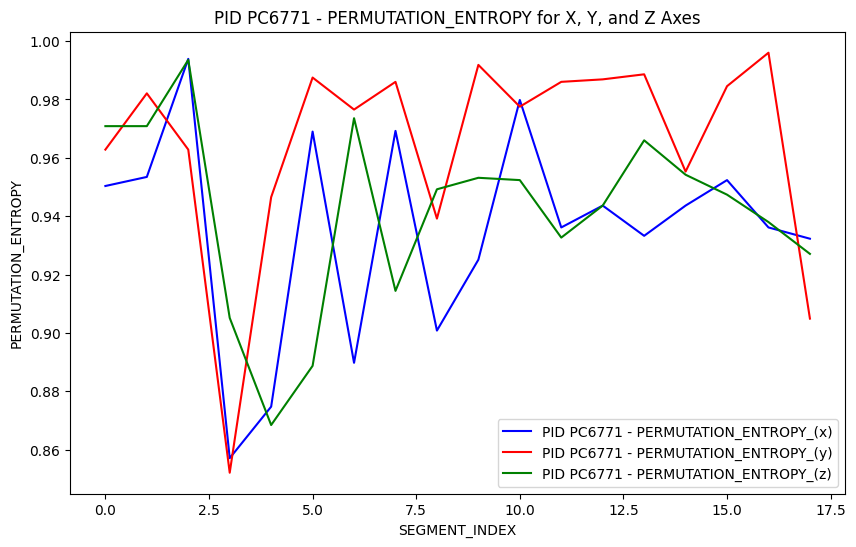

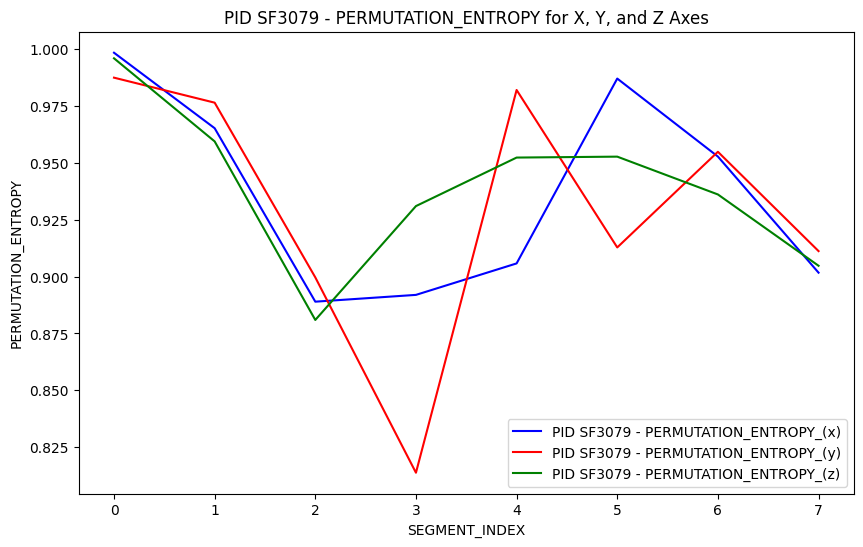

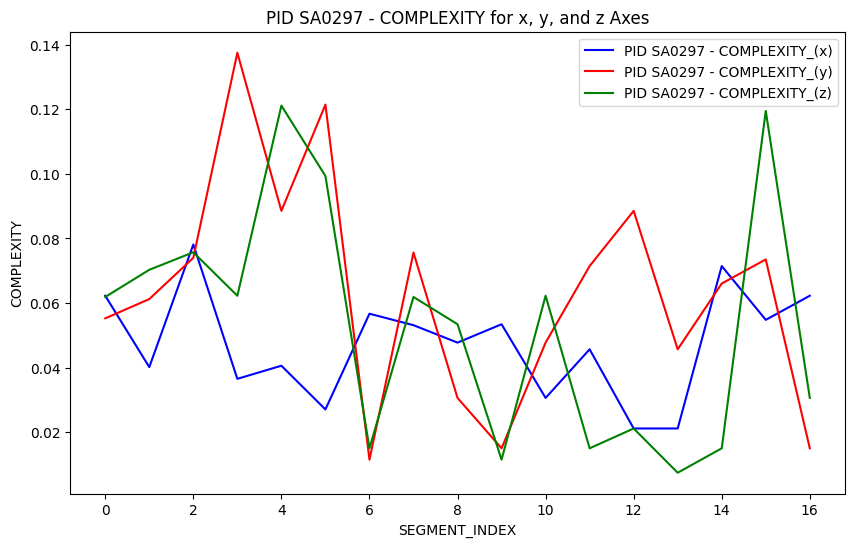

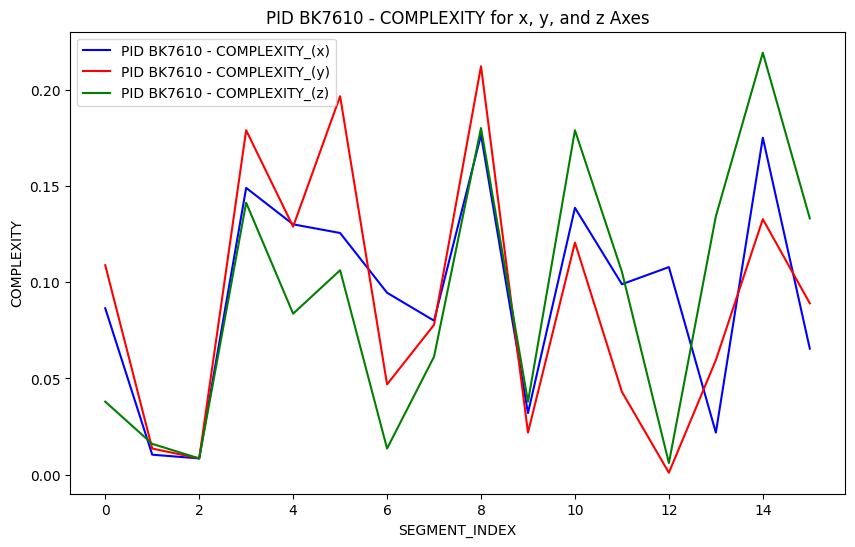

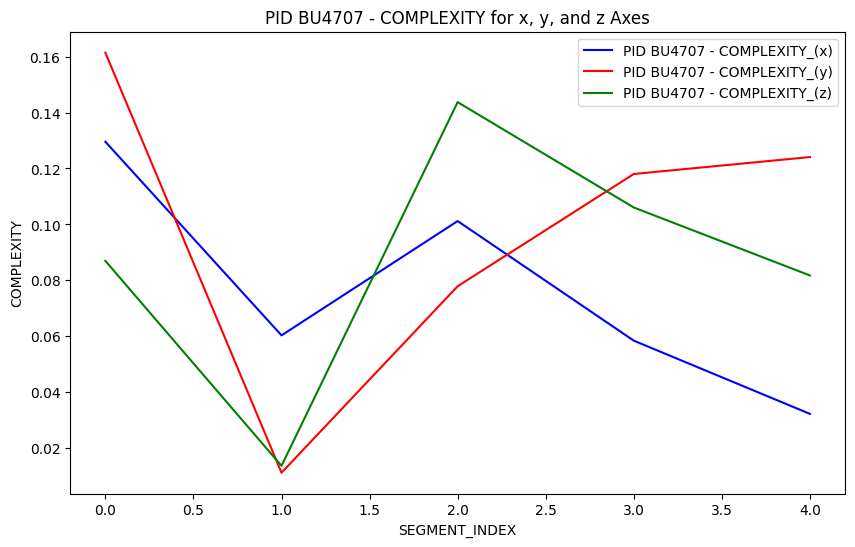

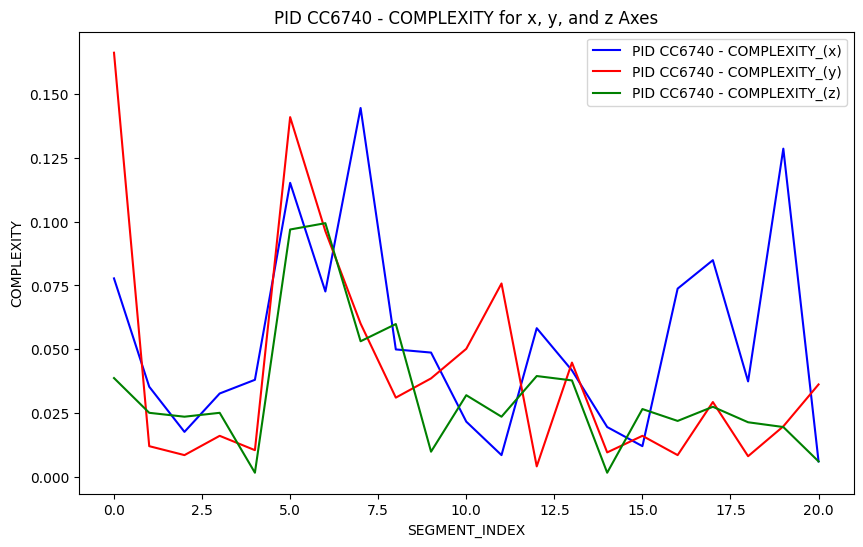

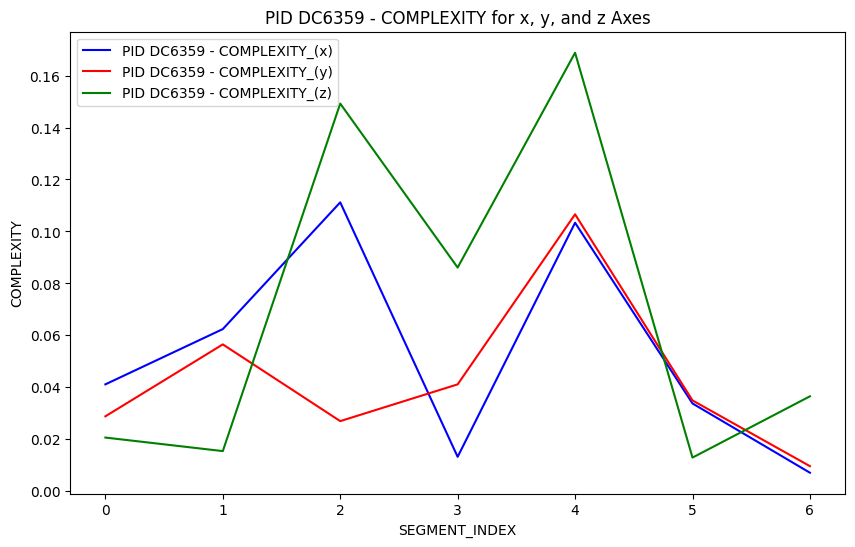

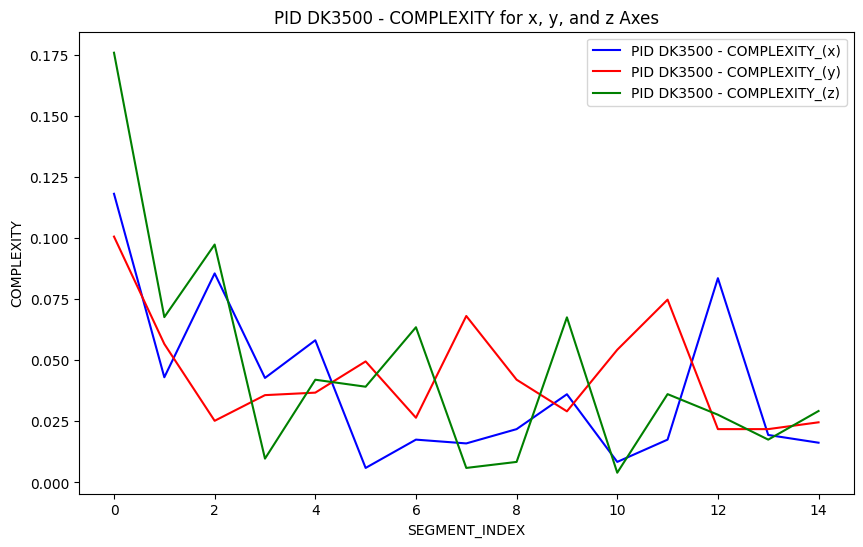

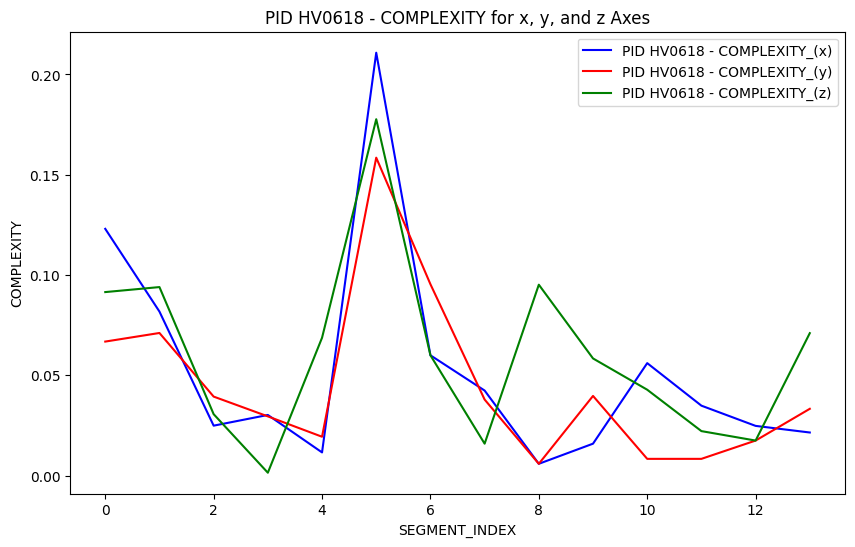

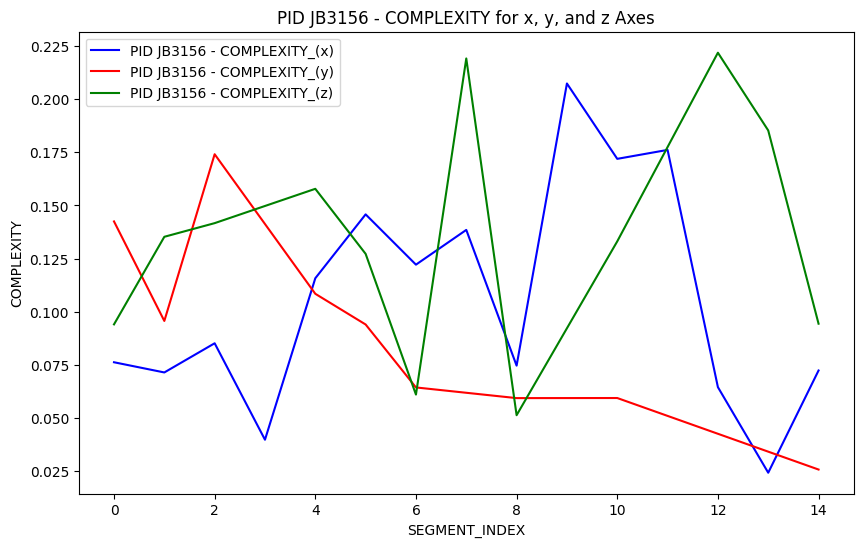

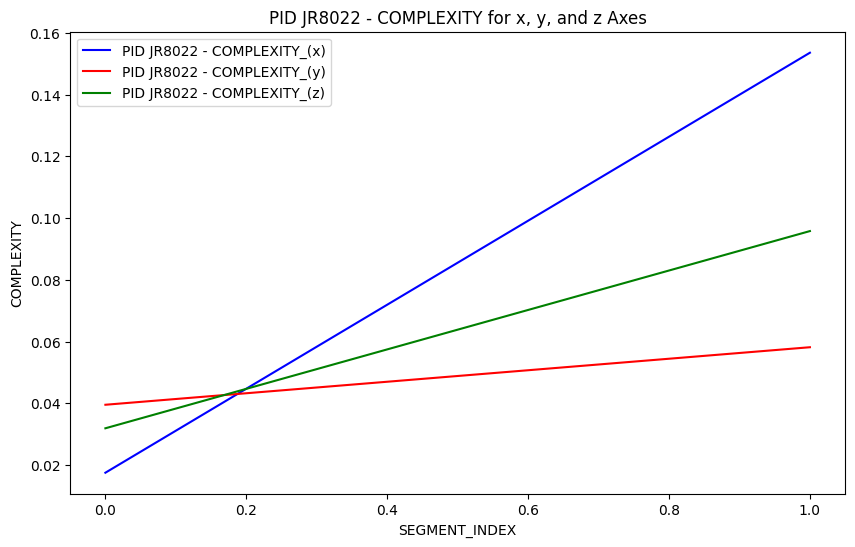

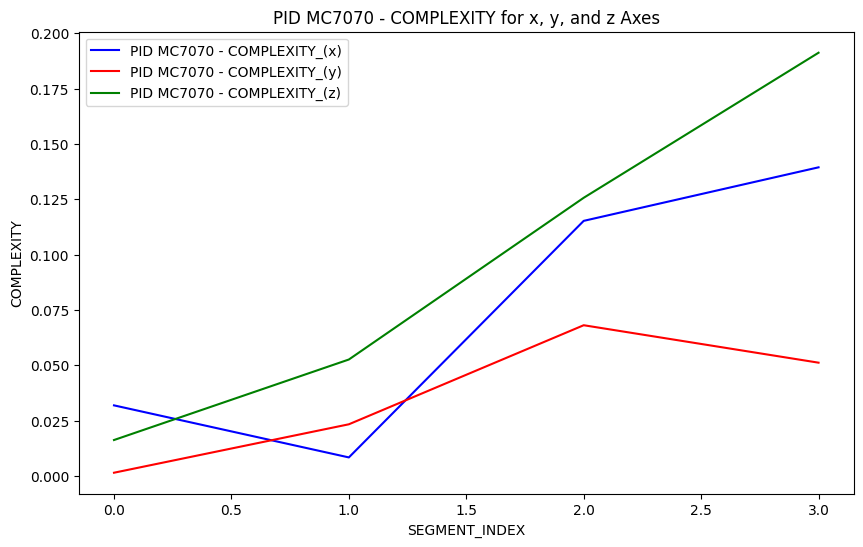

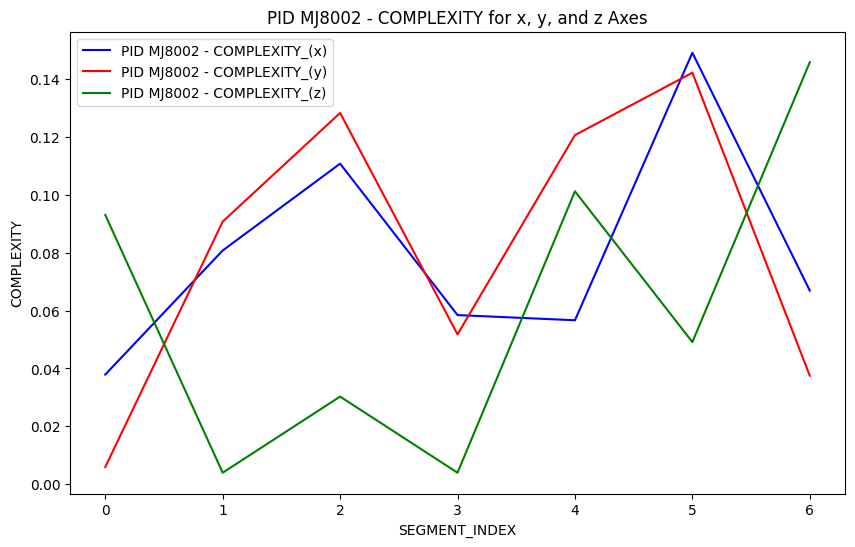

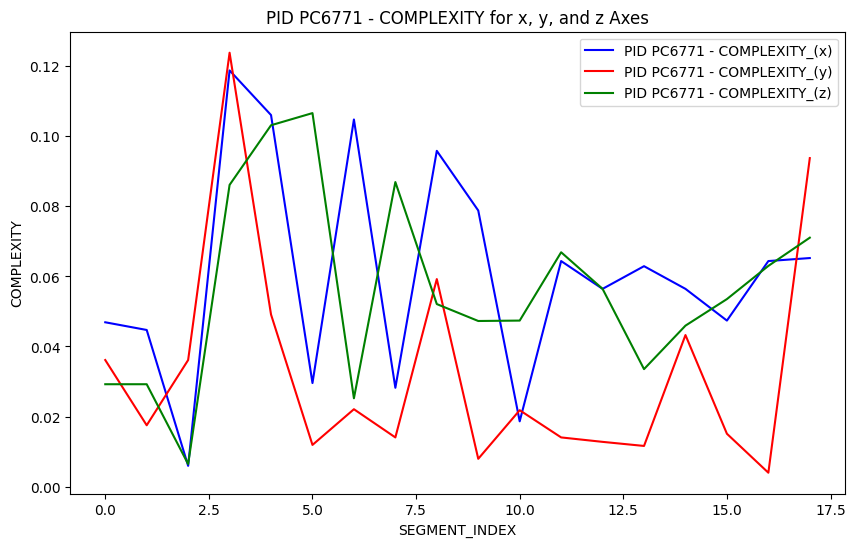

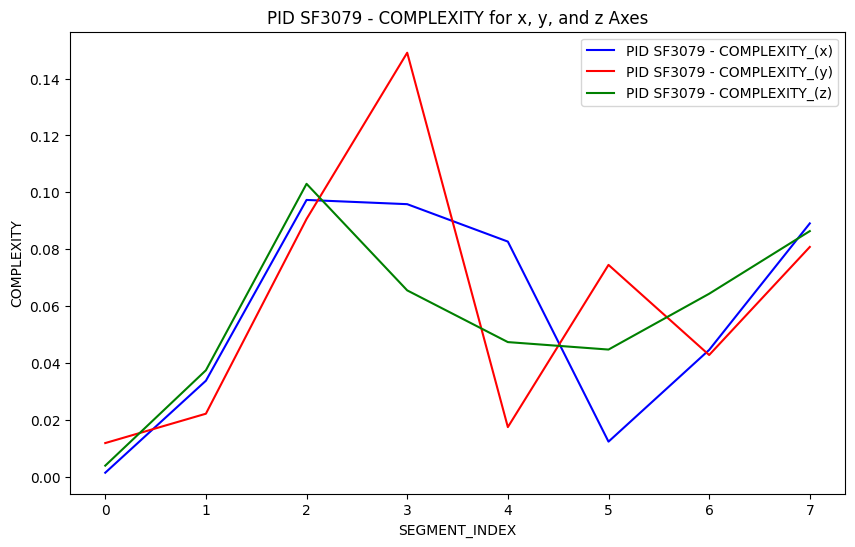

In [ ]:

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

def entropy_s(freq_list):
    freq_list = [element for element in freq_list if element != 0]
    entropy_sh = 0.0
    for freq in freq_list:
        entropy_sh += freq* np.log(freq)
    entropy_sh = -entropy_sh
    return entropy_sh

def ordinal_pattern(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = np.array(ts)
    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * math.factorial(n-1) + _hash(x[:, 1:])

def entropy_p(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return entropy_s(p) / max_entropy

def complexity(op):
    pe = entropy_p(op)
    constant1 = (0.5 + ((1 - 0.5) / len(op))) * np.log(0.5 + ((1 - 0.5) / len(op)))
    constant2 = ((1 - 0.5) / len(op)) * np.log((1 - 0.5) / len(op)) * (len(op) - 1)
    constant3 = 0.5 * np.log(len(op))
    Q_o = -1 / (constant1 + constant2 + constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5 * temp_op_prob) + (0.5 * (1 / len(op)))
    JSdivergence = (entropy_s(temp_op_prob2) - 0.5 * entropy_s(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return Comp_JS

def cal_complexity_entropy(df_segment, axis):
    op = ordinal_pattern(df_segment[axis], 3, 1)  # Assuming 'ordinal_pattern' function is defined
    pe = entropy_p(op)  # Assuming 'entropy_p' function is defined
    comp = complexity(op)  # Assuming 'complexity' function is defined
    return pe, comp

segment_start_indices_dict = {}
for pid, merged_pid_data in merged_dict_data.items():
    segment_start_indices = [0]
    for i in range(1, len(merged_pid_data)):
        if merged_pid_data['TAC_Reading'].iloc[i] != merged_pid_data['TAC_Reading'].iloc[i-1]:
            segment_start_indices.append(i)
    segment_start_indices_dict[pid] = segment_start_indices

pe_results_dict = {}
comp_results_dict = {}
for pid, merged_pid_data in merged_dict_data.items():
    segment_start_indices = segment_start_indices_dict[pid]
    pe_results_pid = {'x': [], 'y': [], 'z': []}
    comp_results_pid = {'x': [], 'y': [], 'z': []}
    for i in range(1, len(segment_start_indices)):
        segment_start_index = segment_start_indices[i-1]
        segment_end_index = segment_start_indices[i]
        df_segment = merged_pid_data.iloc[segment_start_index:segment_end_index]

        pe_x, comp_x = cal_complexity_entropy(df_segment, 'x')
        pe_y, comp_y = cal_complexity_entropy(df_segment, 'y')
        pe_z, comp_z = cal_complexity_entropy(df_segment, 'z')

        pe_results_pid['x'].append(pe_x)
        pe_results_pid['y'].append(pe_y)
        pe_results_pid['z'].append(pe_z)
        comp_results_pid['x'].append(comp_x)
        comp_results_pid['y'].append(comp_y)
        comp_results_pid['z'].append(comp_z)

    pe_results_dict[pid] = pe_results_pid
    comp_results_dict[pid] = comp_results_pid

colors = ['blue', 'green', 'red']

for pid, pe_results_pid in pe_results_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pe_results_pid['x'], label=f'PID {pid} - PERMUTATION_ENTROPY_(x)', color = 'blue')
    sns.lineplot(data=pe_results_pid['y'], label=f'PID {pid} - PERMUTATION_ENTROPY_(y)', color = 'red')
    sns.lineplot(data=pe_results_pid['z'], label=f'PID {pid} - PERMUTATION_ENTROPY_(z)', color = 'green')
    plt.xlabel('SEGMENT_INDEX')
    plt.ylabel('PERMUTATION_ENTROPY')
    plt.title(f'PID {pid} - PERMUTATION_ENTROPY for X, Y, and Z Axes')
    plt.legend()
    plt.show()

for pid, comp_results_pid in comp_results_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=comp_results_pid['x'], label=f'PID {pid} - COMPLEXITY_(x)', color = 'blue')
    sns.lineplot(data=comp_results_pid['y'], label=f'PID {pid} - COMPLEXITY_(y)', color = 'red')
    sns.lineplot(data=comp_results_pid['z'], label=f'PID {pid} - COMPLEXITY_(z)', color = 'green')
    plt.xlabel('SEGMENT_INDEX')
    plt.ylabel('COMPLEXITY')
    plt.title(f'PID {pid} - COMPLEXITY for x, y, and z Axes')
    plt.legend()
    plt.show()



#Insights and Conclusion

### We used data from the Bar Crawl dataset to examine the effectiveness of permutation entropy and complexity approaches in identifying instances of heavy drinking. After carefully examining, the values are close to 1 in the complexity and permutation entropy graphs indicate that the accelerometer data is too complex to distinguish between excessive and moderate drinking. The data is extremely irregular and difficult to interpret.